# Geosoft Voxels

An important geoscience data structure is a voxel (voxset), which is a 3D cell-based model of the subsurface volume of part of the Earth. Voxel models are commonly used to represent some property of the subsurface in which the entire volume of interest is subdivided into cells, each with a value that represents a property of the cell volume. In the example below we present a VOXI density model of the R.J. Smith test range from Western Australia.

We work with voxels using the ```Vox``` class and the ```Vox_display``` class.  The ```Vox``` class can be used to open a Geosoft voxel or create a new Geosoft voxel, and the ```Vox_display``` class can create a visualization of a voxel that can be placed in a 3D view.

## What You Will Learn

1. How to open an existing Geosoft voxel.
2. How to see the properties of a Geosoft Voxel.
2. How to view a Geosoft voxel.

> Some features in this notebook may require a Geosoft End-User License/Subscription.

## Imports, GX context and get data from GitHub

In [1]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgroup
import geosoft.gxpy.vox as gxvox
import geosoft.gxpy.vox_display as gxvoxd
import geosoft.gxpy.viewer as gxviewer
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.map as gxmap
from IPython.display import Image

gxc = gx.GXpy()

vox_file = 'rjsmith_voxi_density.geosoft_voxel'
url = 'https://github.com/GeosoftInc/gxpy/raw/master/examples/tutorial/Geosoft%20Voxels/'
gxu.url_retrieve(url + vox_file)
gxu.url_retrieve(url + vox_file + '.xml')

'rjsmith_voxi_density.geosoft_voxel.xml'

## Voxel properties

In [2]:
# open the vox
with gxvox.Vox.open(vox_file) as vox:
    
    # show some of the vox properties
    print(vox.name)
    print('dimensions (nx, ny, nz):', vox.nx, vox.ny, vox.nz)
    print('coordinate system:', vox.coordinate_system)
    print('surface extent:', vox.extent_2d)
    print('unit of measure:', vox.unit_of_measure)
    print('depth cell sizes in', vox.coordinate_system.unit_of_measure, ':')
    for cell in vox.cells_z:
        print('\t', cell)

rjsmith_voxi_density
dimensions (nx, ny, nz): 143 148 29
coordinate system: WGS 84 / MGA zone 50
surface extent: (501749.99999999994, 6466950.000000001, 508899.99999999994, 6474350.000000001)
unit of measure: g/cc
depth cell sizes in m :
	 158.529518431
	 146.78659114
	 135.913510315
	 125.845842884
	 116.523928596
	 107.892526478
	 99.9004874796
	 92.50045137
	 85.6485660834
	 79.304227855
	 73.4298406064
	 67.9905931541
	 62.9542529205
	 58.2909749264
	 53.9731249318
	 49.9751156776
	 46.273255257
	 42.8456067195
	 39.6718580736
	 36.73320192
	 34.012224
	 31.4928
	 29.16
	 27.0
	 25.0
	 25.0
	 25.0
	 25.0
	 25.0


## View the voxel

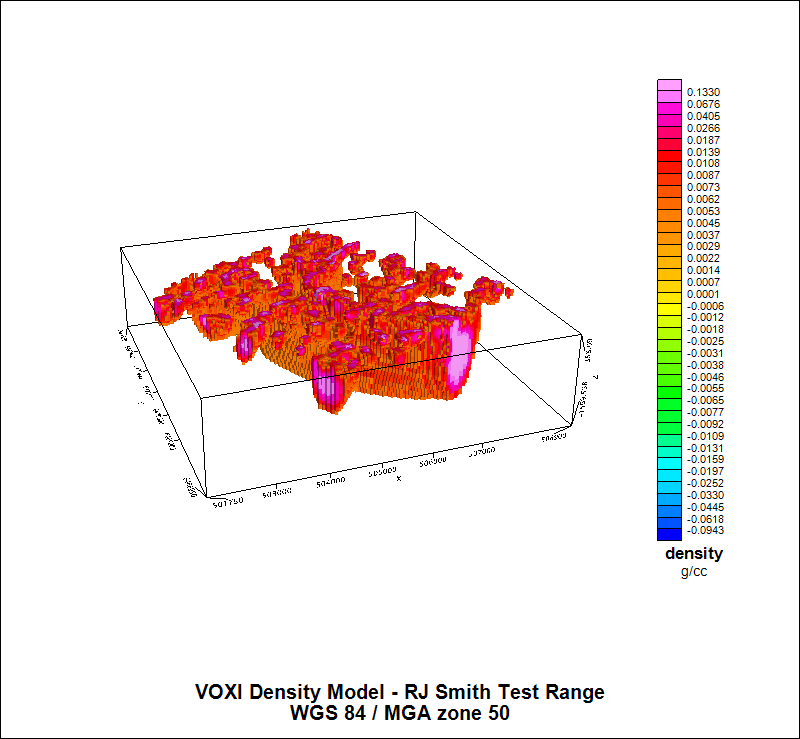

In [3]:
# open the vox
with gxvox.Vox.open(vox_file) as vox:
    
    # create a display instance
    with gxvoxd.Vox_display.new(vox) as voxd:
        
        # limit the display to densities above 0.005 g/cc
        voxd.shell_limits = (0.005, None)
        
        # Create a title and include the coordinate system.
        title = "VOXI Density Model - RJ Smith Test Range" + '\n' + str(vox.coordinate_system)
        
        # create a figure map for the vox. This creates a 3D view that is placed on a map and annotated 
        # to create a default presentation figure. By not specifying a name for the map a temporary map
        # is created only for the life of this Python session.
        vox_map_file = voxd.figure_map(title=title, legend_label='density\ng/cc').file_name

# create a PNG from the figure map and display in Jupyter
Image(gxmap.Map.open(vox_map_file).image_file(pix_width=800))

## Show a voxel in the Geosoft 3D viewer

In this example we depend on the creation of a temporary ```geosoft_3dv``` file, which will only exist during the life of the Geoso=ft context. If you would like the file to persist you need to profide a `

In [4]:
# create a display instance
with gxvoxd.Vox_display.new(gxvox.Vox.open(vox_file)) as voxd:

    # limit the display to densities above 0.005 g/cc
    voxd.shell_limits = (0.005, None)

    with gxview.View_3d.new() as v3d:
        gxgroup.Vox_display_group.new(v3d, voxd)
        v3d_file = v3d.file_name

gxviewer.view_document(v3d_file, wait_for_close=False)